In [3]:
print(1)

1


# Abstract

This report explores the usage of scientific python to determine the Fourier coefficients of selected functions. Further, it also looks at the convergence of fourier series and attempts to draw conclusions about the convergence of the fourier series of piecewise smooth functions and the Gibbs phenomenon. Two approaches are used to determine the fourier coefficients- integration using the quad function and the least squares approach.  

# Introduction

Two functions are considered for the following fourier analysis- the exponential function $e^x$ and the $cos(cos(x))$ function. The former function is extended periodically to the real number line and is $2\pi$ periodic. The $cos(cos(x))$ function is periodic and continuous with the period $2\pi$. The $quad$ function from the Scipy library is used to obtain the first 51 fourier coefficients of the functions. These are plotted and analysed. This is followed by the use of the least squares approach to do the same. Finally the reconstructed functions are analysed.  

# Methods and results

We begin by making the necessary imports- the numpy and matplotlib libraries and $quad$ from the scipy library. Furhter we set all image sizes to 10 x 8. The functions necessary to obtain the fourier coefficients are defined the next piece of code. These include the $e^x$, $cos(cos(x))$, $e^{x}cos(kx)$, $e^{x}six(kx)$, $cos(cos(x))cos(kx)$, $cos(cos(x))sin(kx)$. The latter eight functions are integrated to obtaing the $kth$ fourier coefficients $a_k$ and $b_k$.  



In [4]:
from __future__ import division
% matplotlib inline

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import quad

size=(10,8)

In [5]:

#functions

def exponential(x):
    return np.exp(x)

def coscos(x):
    return np.cos(np.cos(x))

def expcos(x,k):
    return (exponential(x))*np.cos(k*x)

def expsin(x,k):
    return (exponential(x))*np.sin(k*x)

def cccos(x,k):
    return (coscos(x))*np.cos(k*x)

def ccsin(x,k):
    return (coscos(x))*np.sin(k*x)

The following two functions are the focus of this work and are inherently $2\pi$ periodic or extended to be so on the real number line. 

\begin{align}
f_1(x) &= e^x\\
f_2(x ) &= cos(cos(x))
\end{align}

The exponential function is plotted on the semilog scale and the $cos(cos(x))$ function on the linear scale over the interval $[-2\pi, 4\pi)$. The input vector to the predefined functions is created using the $arange$ function in numpy. 


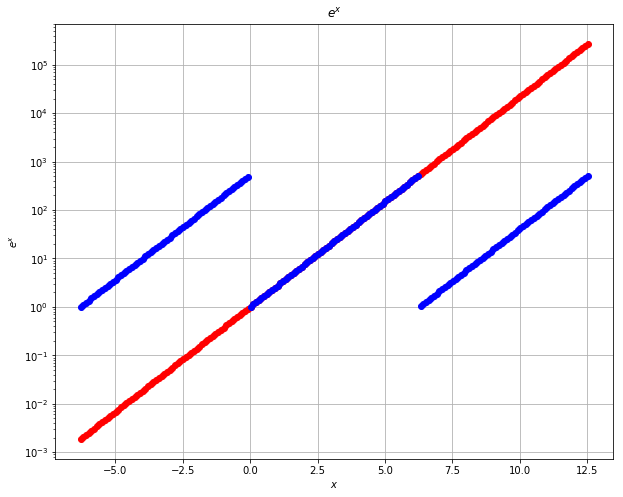

In [6]:
valuerange= np.arange(-2*np.pi, 4*np.pi, 0.1)
periodicfunc=[]
for i in range(0,len(valuerange)):
    if valuerange[i]<=0:
        periodicfunc.append(exponential(valuerange[i]+2*np.pi))
    if 0<valuerange[i]<=2*np.pi:
        periodicfunc.append(exponential(valuerange[i]))        
    if 2*np.pi<valuerange[i]<4*np.pi:
        periodicfunc.append(exponential(valuerange[i]-2*np.pi))
        
fig1= plt.figure(1, figsize= size)
axes1= fig1.add_subplot(1,1,1)
axes1.grid(True)
axes1.set_xlabel("$x$")
axes1.set_ylabel("$e^x$")
axes1.set_title("$e^x$")
random=axes1.semilogy(valuerange, exponential(valuerange),"ro")
random=axes1.semilogy(valuerange, periodicfunc,"bo")




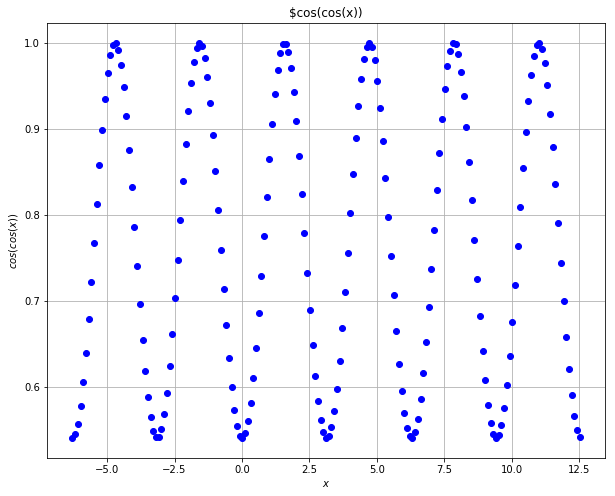

In [7]:

fig2= plt.figure(2, figsize= size)
axes2= fig2.add_subplot(111)
axes2.grid(True)
axes2.set_xlabel("$x$")
axes2.set_title("$cos(cos(x))")
axes2.set_ylabel("$cos(cos(x))$")
graph= axes2.plot(valuerange, coscos(valuerange),"bo")



As mentioned, these functions are extended periodically over the real line with a period of $2\pi$. Thus we compute their first 51 fourier coefficents as follows

\begin{align}
a_0 &= \frac{1}{2\pi}\int^{2\pi}_0 f(x)dx\\
a_n &= \frac{1}{\pi}\int^{2\pi}_0 f(x)cos(nx)dx\\
b_n &= \frac{1}{\pi}\int^{2\pi}_0 f(x)sin(nx)dx
\end{align}

We make use of the $quad$ function to determine the first 25 coeffiecients using a for loop. These coefficients are computed using a for loop for both the functions and then plotted on a semilog and loglog scale

1


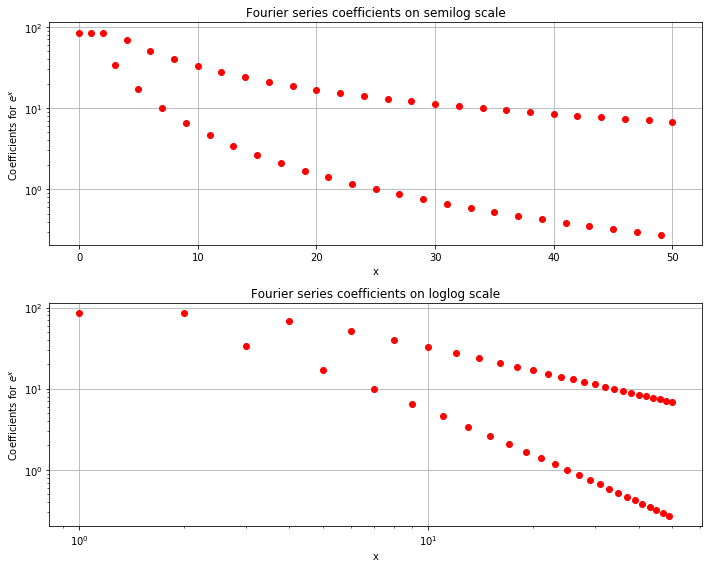

In [8]:
# to find the vector of 25 pairs of coefficients

#find the coefficients for exponential

coffexp=[]
a0= quad(exponential, 0, 2*np.pi)[0]

a0= a0/(2)

coffexp.append(a0)
for i in range(1,26):
    ai= quad(expcos, 0, 2*np.pi, args=(i))[0]
    bi= quad(expsin, 0, 2*np.pi, args=(i))[0]
    coffexp.append(ai)
    coffexp.append(bi)

coffexp= (np.array(coffexp))/(np.pi)


fig3= plt.figure(3, figsize= size)
axes30= fig3.add_subplot(211)
axes30.set_xlabel("x")
axes30.set_ylabel("Coefficients for $e^x$")
axes30.set_title("Fourier series coefficients on semilog scale")
axes30.grid(True)
graph= axes30.semilogy( abs(coffexp), "ro")

axes31= fig3.add_subplot(212)
axes31.set_xlabel("x")
axes31.set_ylabel("Coefficients for $e^x$")
axes31.set_title("Fourier series coefficients on loglog scale")
axes31.grid(True)
graph= axes31.loglog( abs(coffexp), "ro")
plt.tight_layout()

print(1)


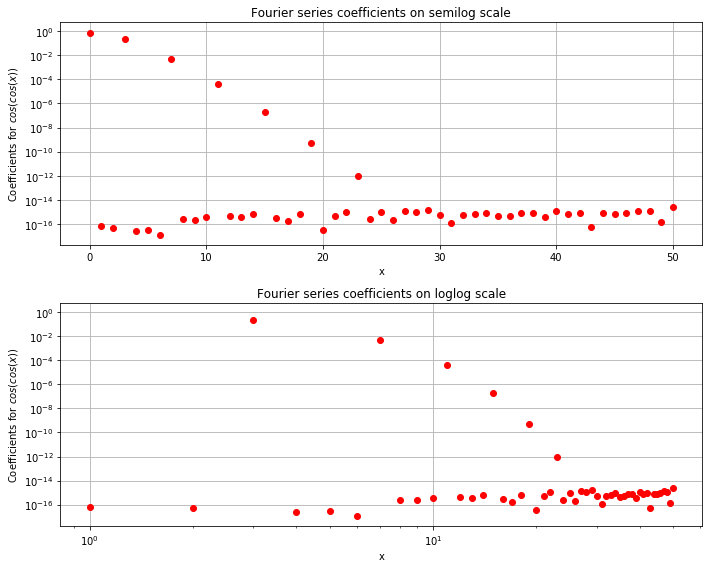

In [9]:
# to find the vector of 25 coefficients

#find the coefficients for exponential

coffcc=[]
a0= quad(coscos, 0, 2*np.pi)[0]

a0= a0/(2)
coffcc.append(a0)
for i in range(1,26):
    ai= quad(cccos, 0, 2*np.pi, args=(i))[0]
    bi= quad(ccsin, 0, 2*np.pi, args=(i))[0]
    coffcc.append(ai)
    coffcc.append(bi)

coffcc= (np.array(coffcc))/(np.pi)


fig4= plt.figure(4, figsize= size)
axes40= fig4.add_subplot(2,1,1)
axes40.set_xlabel("x")
axes40.set_ylabel("Coefficients for $cos(cos(x))$")
axes40.set_title("Fourier series coefficients on semilog scale")
axes40.grid(True)
graph= axes40.semilogy( abs(coffcc), "ro")

axes41= fig4.add_subplot(2,1,2)
axes41.loglog( abs(coffcc), "ro")
axes41.set_xlabel("x")
axes41.set_ylabel("Coefficients for $cos(cos(x))$")
axes41.grid(True)
axes41.set_title("Fourier series coefficients on loglog scale")

plt.tight_layout()



The least squares approach is an alternate approach to direct integration. Here we try to approximate the given functions $f_1$ and $f_2$ with only 25 sinusoids. The vector $x$ in the following code contains 400 equally spaced values from $0$ to $2\pi$ (inclusive). For a given function, the following code constructs a vector $b$ of the values of the function at each of the values in $x$. The vector A is the matrix\\

A= $\left(
\begin{matrix}
1 & cosx_1 & sinx_1 & ... & cos25x_1 & sin25x_1\\
1 & cosx_2 & sinx_2 & ... & cos25x_2 & sin25x_2\\
... & ... & ... & ... & ..._1 & ...\\
1 & cosx_{400} & sinx_{400} & ... & cos25x_{400} & sin25x_{400}
\end{matrix}
\right)$

The piece of code $c= np.linalg.lstsq(A,b)[0]$ determines a vector $c$ that best suits the equation 
\begin{equation}
Ac = b
\end{equation}

In [14]:
x= np.linspace(0, 2*np.pi, 401)
x= x[:-1]
A= np.zeros((400,51))
A[:,0]= 1
for i in range(1,26):
    A[:,2*i -1]= np.cos(i*x)
    A[:,2*i]= np.sin(i*x)
    
b_exp= exponential(x)
b_cc= coscos(x)

c_exp= np.linalg.lstsq(A,b_exp)[0]
c_cc= np.linalg.lstsq(A,b_cc)[0]


/home/milind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':
/home/milind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


The obtained coefficients are plotted on the corresponding figures to compare the deviation with the coefficients obtained from the $quad$ function. 

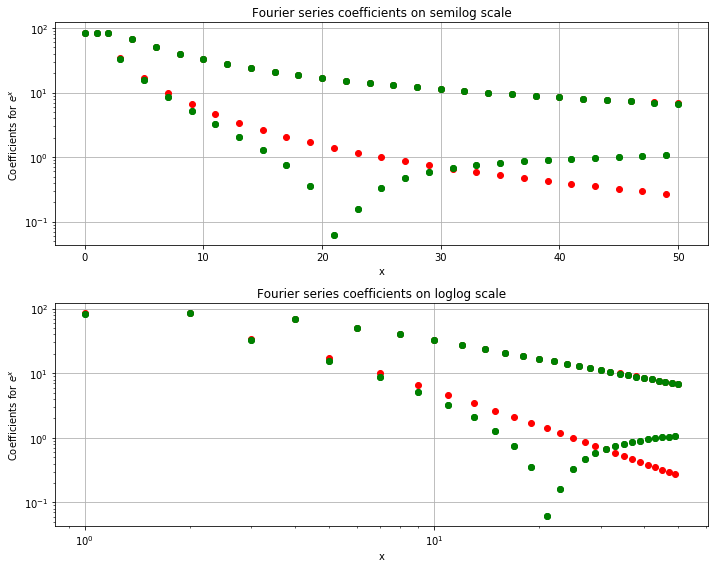

In [15]:

graph= axes30.semilogy(abs(c_exp), "go")
graph= axes31.loglog(abs(c_exp), "go")
fig3


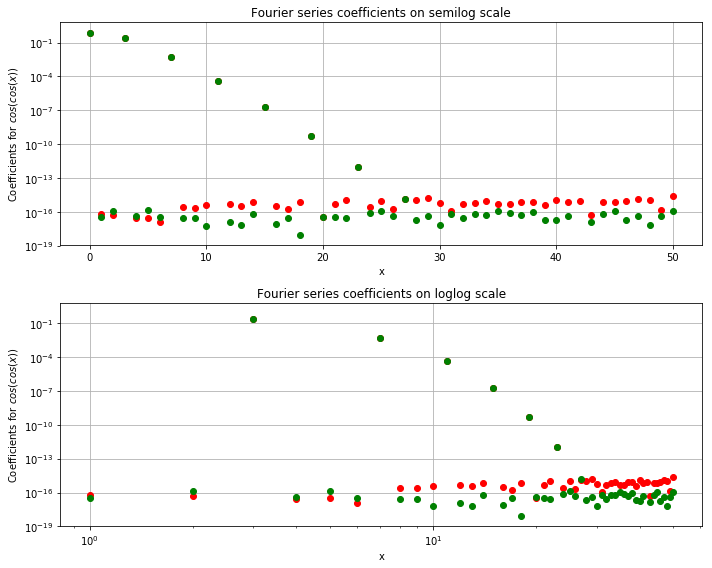

In [12]:
graph= axes40.semilogy(abs(c_cc), "go")
graph= axes41.loglog(abs(c_cc), "go")
fig4


The errors between the coefficients computed by quad and the least squares approach are computed.

In [16]:
print (max(abs(c_exp-coffexp)))
print (max(abs(c_cc-coffcc)))


1.3327308703353111
2.705971396450725e-15


The vector $Ac$ is computed to determine the value of the function at the 400 points given by vector x. This is doen for both the functions and plotted on the correspoding graphs in green.

In [ ]:
expvalues= np.dot(A,c_exp)

graph= axes1.semilogy(x, expvalues, 'go')
fig1

In [ ]:
ccvalues= np.dot(A,c_cc)
graph=axes2.plot(x, ccvalues, "go")
fig2

# Discussion and conlusion

From figure1 and figure2 we note that the function $e^x$ is clearly aperodic and the function $cos(cos(x))$ is periodic with a fundamental period $\pi$. The fourier series with the coefficients computed will result in $2\pi$ periodic function that is extended to the real line. Further upon computing and plotting the fourier coefficients, the $b_n$ coefficeints for the $cos(cos(x)$ function turn out to be zero. This, of course is a consequence of the function being even, which can alternately be understood as symmetry about the line $x = \pi$. The fourier coefficients do not converge as quickly for $e^x$ as they do for $cos(cos(x)$. This is because the latter function is infinitely diffrentiable and thus its fourier coefficients experience exponential decay. The exponential function, extended the way it is, has jump discontinuities and thus, its $k^{th}$ coefficients decay as $\frac{1}{k}$ which is slower than exponential decay. 
Thus in the case of $e^x$ the loglog plot looks linear as its coefficients decay as  $\frac{1}{k}$.
\begin{align}
a_k  &\propto  \frac{1}{k}\\
log(a_k)  &\propto -log(k)
\end{align}

However in the case of $cos(cos(x))$, the coefficients decay as $r^k$
\begin{align}
a_k  &\propto  r^k,   &r<1\\
log(a_k)  &\propto  klog(r),  &log(r)<0
\end{align}
This results in the semilog plot being a straight line with a negative slope. 

From the replotted figures, it is evident that the fourier coefficients agree closely for the $cos(cos(x))$ function. This follows from the above argument. Rapid decay of the coefficients implies that the first few coefficients are sufficient to "fit" or describe the function well and hence will closely agree with the result of the least squares "best fit". The same can not be said of the coefficients of the exponential function which decay much slower. Hence the large deviation in coefficients. This also explains why the recomputed function ($Ac$) will not agree closely with the original function in case of $e^x$. This plot displays ripples due to Gibbs phenomenon which occurs due to the presence of a jump discontinuity in the function and the use of a finite sequence approximation.

Thus, this work makes a study of the variation of the fourier coefficients and the rate of convergence of the series for different functions. It does so by making comprehensive use of scientific python to determine the coefficients in multiple ways, plot them and compare them.   